# Third Goal: (Analysis)
<b>Goal</b>: Know and apply machine-learning techniques. <p>
<b>Present</b>: I completed the course “Advanced Statistics” and only know that machine-learning requires training an algorithm.<p>
<b>Measure</b>: At the end of the course, I want to be able to name and apply two different types of machine-learning methods in Python.


Within this notebook, two machine-learning algorithms are applied: random forest and naive bayes. Both are classification algorithms, which means that they are used to predict the label of an object based on its attributes.

### Random Forests
The first machine-learning algorithm in this nootebook is the Random Forest algorithm. This machine-learning algorithm is meant to reduce the overfitting (creation of too complex strucutres) of single decision trees. Therefore, a Random Forest generates multiple decision trees which then vote in single vote system on the best-fitting label.
### Naive Bayes
The second machine-learning algorithm used in this notebook is the Naive Bayes algorithm, which uses the Bayes theorem of propability to assign labels to objects. <p>

To apply machine learning algorithms,  datasets are split up into a learning set, which is used to train the algorithm, and a validation set, which is used to test the trained algorithm. Following the general rule of thumb, within this notebook 1/5 of the available data is used for validation.<p>
This notebook includes two projects. Within each project, both machine-learning techniques are applied.

In [1]:
#Import modules
import pandas as pd
import numpy as np
import nltk as nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Project 1: Sentiment Analysis
The objective in this first project is to conduct a sentiment analysis on a twitter dataset. In the process, both machine-learning algorithms are applied to predict the sentiment of a tweet (i.e. positive or negative). The twitter dataset is accessible via Github.   

In [2]:
#Import the data
df = pd.read_csv('https://raw.githubusercontent.com/MohamedAfham/Twitter-Sentiment-Analysis-Supervised-Learning/master/Data/train_tweets.csv')
print(df.head(5))

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


df.shape:  (31962, 3)


<AxesSubplot:xlabel='label', ylabel='count'>

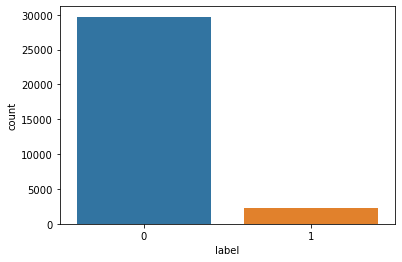

In [3]:
#Simple data exploration
print('df.shape: ', df.shape)
sns.countplot(x= 'label', data=df)

This dataset includes more tweets than the dataset that group SOCIAL 2 used in its sentiment analysis. However, the dataset features a dispropotionate number of positiv tweets, which are indicated by a 0. Nevertheless, the dataset is already nicely structured, which facilitates the whole analysis. <p>
In the following, the dataframe is cleaned, tokenised and split up into a matrix (X) containing the explanatory variables (i.e. the tweets) and a vector (y) containing the sentiment of each tweet.

In [4]:
#Data cleaning
#Create a function that cleans each tweet from non-alphabetic characters and stopwords
def clean_tweettext(text_col):
    clean_text = ''
    tokens =  nltk.word_tokenize(text_col)
    clean_list = [w for w in tokens if w.isalpha() and w.lower() not in stopwords.words('english') and w != 'user']
    
    return ' '.join(map(str, clean_list))
#Apply cleaning function - might take some time!
df['tweet'] = df['tweet'].apply(clean_tweettext)

In [5]:
df.head()

,id,label,tweet
0,1,0,father dysfunctional selfish drags kids dysfun...
1,2,0,thanks lyft credit ca use cause offer wheelcha...
2,3,0,bihday majesty
3,4,0,model love u take u time
4,5,0,factsguide society motivation


In [6]:
#Tokenise the data
df['tweet'] = df['tweet'].apply(nltk.word_tokenize)
df.head()

,id,label,tweet
0,1,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,2,0,"[thanks, lyft, credit, ca, use, cause, offer, ..."
2,3,0,"[bihday, majesty]"
3,4,0,"[model, love, u, take, u, time]"
4,5,0,"[factsguide, society, motivation]"


In [7]:
#Split dataframe into explanatory and predictor
#Explanatory
X = df['tweet']
#Predictor
y = df['label']
print(X.head(5))
y.head(5)

0    [father, dysfunctional, selfish, drags, kids, ...
1    [thanks, lyft, credit, ca, use, cause, offer, ...
2                                    [bihday, majesty]
3                      [model, love, u, take, u, time]
4                    [factsguide, society, motivation]
Name: tweet, dtype: object


0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

So far so good. Unfortunately, at this point I came to realise that random forests can only interpret  numbers (int/float) and not strings. In order to solve this problem, I 'translate' each string in X into a number by using the sklearn LabelEncoder. Therefore, I firstly generate a large dictionary that includes a numeric translation for each word included in the tweets by fitting the LabelEncoder on a long string that contains all tweets. Secondly, the LabelEncoder algorithm is then applied on X to translate each word of each tweet into an integer.

In [8]:
#Intitialise LabelEncoder
le = LabelEncoder()

#Create one long string with content
long_string = []
for list in X:
    for text in list:
        long_string.append(str(text))

#Create dictionary by fitting le on long_string
le.fit(long_string)

LabelEncoder()

Now the LabelEncoder is used to translate all strings in the 31962 tweets into a series of numbers, which the random forest algorithm is able to interpret. Because this process of translation requires a lot of time, I start with testing which function might be the fastest to do the job. Therefore, I write two functions - translate_to_digit and alternative -  to apply the LabelEncoder on X and then test their performance using the timeit module. In order to aviod running the test unintentionally, I format the code that executes the test as comments.

In [9]:
#Fist possibility to translate X into numbers via LabelEncoder
import timeit
def translate_to_digit(li):
    translation = []
    for word in li: 
        translation.append(le.transform([word]))
    return translation

#Second possibility
def alternative(li):
    return [le.transform([x]) for x in li]

#Create setup for timeit application
mysetup = '''
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = pd.read_csv('https://raw.githubusercontent.com/MohamedAfham/Twitter-Sentiment-Analysis-Supervised-Learning/master/Data/train_tweets.csv')
X = df['tweet']
import timeit
def translate_to_digit(li):
    translation = []
    for word in li: 
        translation.append(le.transform([word]))
    return translation
def alternative(li):
    return [le.transform([x]) for x in li]
long_string = []
for list in X:
    for text in list:
        long_string.append(str(text))

long_string
le.fit(long_string)
'''
mycode = '''
X = X[0:10].apply(translate_to_digit)
'''
#Run first test
# print('translate_to_digit: ', timeit.timeit(
#    setup = mysetup,
#    stmt = mycode, 
#    number = 100))

mycode2 = '''
X = X[0:10].apply(alternative)
'''
#Run second test
#print('alternative: ',timeit.timeit(
#    setup = mysetup,
#    stmt = mycode2, 
#    number = 100))


'''
OUTPUT
translate_to_digit:  29.56325270000002
alternative:  30.70483009999998
'''
print('OUTPUT: time required to translate 100 tweets [sec]', '\n','translate_to_digit:  29.56325270000002', '\n', 'alternative:  30.70483009999998' )

OUTPUT: time required to translate 100 tweets [sec] 
 translate_to_digit:  29.56325270000002 
 alternative:  30.70483009999998


The experiment shows that the translate_to_digit function works slightly faster than the atlernative function. Therefore I decide to apply the first function on the whole matrix X. Assuming that the function is able to translate 100 tweets in 30 seconds, I estimate that the around 32.000 tweets require 9.600 seconds, which is equal to 160 minutes. In order to avoid conducting the same troublesome procedure twice, the translated matrix is converted into a dataframe, saved as a csv-file and then re-imported. 

In [10]:
#Translate whole X matrix into numbers
#Should take about 2.5h
#X_digit = X.apply(translate_to_digit)

#Convert into dataframe, because random forest can't read lists/arrays
#X_df = pd.DataFrame.from_records(X_digit)

#Safe X_digit to csv so that there is no need to translate it again
#X_df.to_csv('X_df_Translated.csv', mode = 'a', index = False, header = True)

In [11]:
#Re-import translated matrix
X_df = pd.read_csv('https://raw.githubusercontent.com/zyankarli/Data-for-individual-portfolio/main/X_df_Translated.csv')
X_df

C:\Users\schei\anaconda3\envs\NLTK_env\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,[10554],[9150],[27450],[8858],[16846],[9149],[26689],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[30971],[18668],[6980],[4570],[32900],[5066],[22148],[34109],[33023],[23205],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[3170],[18845],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[20073],[18367],[32471],[30450],[32471],[31501],NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[10340],[28706],[20342],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,[1744],[15915],[35179],NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31958,[27370],[21529],[32330],[602],[32232],[34749],[19051],[12272],[13992],[17864],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31959,[17989],[26798],[28841],[20159],[20288],[22613],[34638],[26798],NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31960,[28106],[30824],[33007],[4635],[34804],[6391],[210],NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Each row now represents one tweet, with the numbers in each column indicating the single words translated into numbers.
Next, X_df is formatted in a way that allows it to be handled by the sklearn Random Forest algorithm. This requires that all values in the dataframe are numbers and that NaN values are absent.

In [12]:
#Exchange NaN values for value which is not already in the LabelEncoder 'dictionary'. In this case to -1.
X_df = X_df.fillna(np.array(-1))

#Define function that deletes square brackets
def make_int(string):
    if string != -1:
        return string.strip('[]')
    else:
        return -1

#Apply function on each column
columns = X_df.columns
for i in columns:
  X_df[i] = X_df[i].apply(make_int)

#Convert everything into integer
X_df = X_df.astype(int)
print(type(X_df.loc[0][0]))
X_df

<class 'numpy.int32'>


,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,10554,9150,27450,8858,16846,9149,26689,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,30971,18668,6980,4570,32900,5066,22148,34109,33023,23205,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,3170,18845,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,20073,18367,32471,30450,32471,31501,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,10340,28706,20342,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,1744,15915,35179,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
31958,27370,21529,32330,602,32232,34749,19051,12272,13992,17864,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
31959,17989,26798,28841,20159,20288,22613,34638,26798,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
31960,28106,30824,33007,4635,34804,6391,210,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


Finally the X_df is ready to be used by the Random Forest algorithm. In the following, the Random Forest algorithm is set up, trained and tested.

In [13]:
#RANDOM FOREST
#Initialise random forest. Use 100 decision trees
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 0)

#Split dataset into training and test variables
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.25, random_state=1) 

#Fit the model
random_forest.fit(X_train, y_train)

#Predict outcomes
y_pred = random_forest.predict(X_test)

#Validate model
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))
print("Confusion Matrix:", '\n',metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7451
           1       0.99      0.27      0.43       540

    accuracy                           0.95      7991
   macro avg       0.97      0.64      0.70      7991
weighted avg       0.95      0.95      0.94      7991

Confusion Matrix: 
 [[7450    1]
 [ 393  147]]


To apply the Naive Bayes algorithm the number -1 is in the following replaced by 40000 because Naive Bayes is not able to handle negative digits.

In [14]:
print('Digits already used in le "dictionary" : ', len(le.classes_))
X_train.replace(-1, 40000, inplace=True)
X_test.replace(-1, 40000, inplace=True)
X_train.head(4)

Digits already used in le "dictionary" :  35379
C:\Users\schei\anaconda3\envs\NLTK_env\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
15552,1042,17933,18367,26505,23970,13413,17097,13210,275,11330,...,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000
28199,23161,12449,31364,40000,40000,40000,40000,40000,40000,40000,...,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000
8958,30964,28529,30964,24183,40000,40000,40000,40000,40000,40000,...,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000
7771,16107,18633,18636,7849,7585,17864,34466,40000,40000,40000,...,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000


Now the Naive Bayes algorithm is set up, trained and tested.

In [15]:
#NAIVE BAYES
#Initialise Naive Bayes classifer model
from sklearn.naive_bayes import CategoricalNB
naive_bayes = CategoricalNB()


#Train Naive Bayes Classifer
naive_bayes = naive_bayes.fit(X_train,y_train)

#Predict the outcome for test dataset
y_pred = naive_bayes.predict(X_test)

#Validate model
print(metrics.classification_report(y_test, y_pred))
print("Confusion Matrix:", '\n',metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      7451
           1       0.00      0.00      0.00       540

    accuracy                           0.93      7991
   macro avg       0.47      0.50      0.48      7991
weighted avg       0.87      0.93      0.90      7991

Confusion Matrix: 
 [[7451    0]
 [ 540    0]]
C:\Users\schei\anaconda3\envs\NLTK_env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\schei\anaconda3\envs\NLTK_env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### Results
The results show that both algorithms achieve a surprisingly high accuracy of 95% and 93%. However, it must be noted that both algrithms perform badly in recognising negative tweets. For the Random Forest, this is indicated through the high number of false positives (393) compared to 147 true negatives in the confusion matrix. The Naive Bayes algorithm achieves a accurcay of 93% by simply labelling every tweet as positive. Therefore, I conclude that the underlying dataset does not include enough negative tweets to train the machine-learning algorithms properly and thereby leads to bias towards positive tweet sentiment.

## Project 2: Stock Markets
The objectives of this second project is to predict the weekly increase or decrease of the Dow Jones Industrial Average through the two stock market indices S&P500 and NASDAQ Composite as well as the crude oil price. The data used is weekly stock market data from the beginning of 2002 until the end of 2011.

In [16]:
#Load the data
dow = pd.read_csv('https://raw.githubusercontent.com/zyankarli/Data-for-individual-portfolio/main/Dow%20Jones%20Industrial%20Average.txt', sep = ';')
nas = pd.read_csv('https://raw.githubusercontent.com/zyankarli/Data-for-individual-portfolio/main/NASDAQ%20Composite.txt', sep = ';')
snp = pd.read_csv('https://raw.githubusercontent.com/zyankarli/Data-for-individual-portfolio/main/S%26P%20500.txt', sep = ';')
oil = pd.read_csv('https://raw.githubusercontent.com/zyankarli/Data-for-individual-portfolio/main/Crude%20Oil.txt', sep = ';')

In [17]:
#Check whether all dataframes feature identical structure
print(dow.shape)
dow.head(2)

(522, 7)


,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Dec 27, 2011","12,293.47","12,328.47","12,140.17","12,217.56","12,217.56","2,850,700"
1,"Dec 20, 2011","11,769.21","12,297.44","11,768.83","12,294.00","12,294.00","5,604,600"


In [18]:
print(nas.shape)
nas.head(2)

(522, 7)


,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Dec 27, 2011","2,613.51","2,633.34","2,586.85","2,605.15","2,605.15","4,083,690,000"
1,"Dec 20, 2011","2,567.25","2,618.84","2,544.66","2,618.64","2,618.64","6,165,980,000"


In [19]:
print(snp.shape)
snp.head(2)

(522, 7)


,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Dec 27, 2011","1,265.02","1,269.37","1,248.64","1,257.60","1,257.60","9,030,550,000"
1,"Dec 20, 2011","1,205.72","1,265.42","1,205.72","1,265.33","1,265.33","12,740,690,000"


In [20]:
print(oil.shape)
oil.head(2)

(522, 7)


,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Dec 27, 2011",99.92,101.77,98.30,98.83,98.83,"596,872"
1,"Dec 20, 2011",94.14,100.23,94.14,99.68,99.68,"708,640"


The first task is to pre-process all dataframes so that they are fit for use. The fact that all dataframes feature an identical structure allows to apply the same function on all of them.

In [21]:
#Create function to pre-process all dataframes
def prepare_dataframes(df, dataframe_name:str):
    #Drop date because it is not important for the analysis
    df.drop('Date', axis =1, inplace = True)
    #Drop rows that don't inlcude numbers (31st of each year)
    df = df.replace('-', np.nan)
    df.dropna(inplace=True)
    #Convert all values to float
    df = df.replace(',', '', regex=True)
    df = df.astype(float)
    #Rename columns so that they indicate respective dataframe (important for merge)
    new_column_names = {}
    for i in range(len(df.columns)):
        new_column_names[df.columns[i]] = df.columns[i] + "_" + dataframe_name
    df.rename(columns = new_column_names, inplace=True)
    return df

In [22]:
#Apply function on all dataframes
dow = prepare_dataframes(dow, 'dow')
nas = prepare_dataframes(nas, 'nas')
snp = prepare_dataframes(snp, 'snp')
oil = prepare_dataframes(oil, 'oil')

In [23]:
#Check outcome
dow.head(2)

,Open_dow,High_dow,Low_dow,Close*_dow,Adj Close**_dow,Volume_dow
0,12293.47,12328.47,12140.17,12217.56,12217.56,2850700.0
1,11769.21,12297.44,11768.83,12294.00,12294.00,5604600.0


Now that all dataframes have the same strucutre, I create a column in the dow dataframe which indicates whether the prices increased or not within each week.

In [24]:
#Prepare predictor dataframe dow
dow['difference'] = dow['Adj Close**_dow'] - dow['Open_dow']
dow['increase?'] = dow['difference'].apply(lambda i: True if i > 0 else False)

In [25]:
#Check whether NaN-values are present
print('Number of NaN-values: ', dow.isnull().sum().sum())
dow.head(2)

Number of NaN-values:  0


,Open_dow,High_dow,Low_dow,Close*_dow,Adj Close**_dow,Volume_dow,difference,increase?
0,12293.47,12328.47,12140.17,12217.56,12217.56,2850700.0,-75.91,False
1,11769.21,12297.44,11768.83,12294.00,12294.00,5604600.0,524.79,True


In the following, the vector including the predictor and the matrix containing the explanatory variables are created.

In [26]:
#Create predictor 
y = dow['increase?']
y

0      False
1       True
2      False
3      False
4       True
       ...  
517    False
518     True
519    False
520    False
521     True
Name: increase?, Length: 522, dtype: bool

In [27]:
#Create explanatory matrix by merging nas, snp and oil
X = pd.merge(left=nas, right = snp, left_index=True, right_index=True)
X = pd.merge(left=X, right=oil, left_index=True, right_index=True)

In [28]:
X

,Open_nas,High_nas,Low_nas,Close*_nas,Adj Close**_nas,Volume_nas,Open_snp,High_snp,Low_snp,Close*_snp,Adj Close**_snp,Volume_snp,Open_oil,High_oil,Low_oil,Close*_oil,Adj Close**_oil,Volume_oil
0,2613.51,2633.34,2586.85,2605.15,2605.15,4.083690e+09,1265.02,1269.37,1248.64,1257.60,1257.60,9.030550e+09,99.92,101.77,98.30,98.83,98.83,596872.0
1,2567.25,2618.84,2544.66,2618.64,2618.64,6.165980e+09,1205.72,1265.42,1205.72,1265.33,1265.33,1.274069e+10,94.14,100.23,94.14,99.68,99.68,708640.0
2,2629.67,2639.74,2518.01,2523.14,2523.14,9.519480e+09,1236.83,1249.86,1202.37,1205.35,1205.35,2.123582e+10,97.85,101.25,92.52,93.88,93.88,1352446.0
3,2655.02,2663.63,2591.42,2612.26,2612.26,8.232090e+09,1257.19,1267.06,1227.25,1236.47,1236.47,1.962432e+10,100.45,101.94,97.36,97.77,97.77,1486152.0
4,2529.11,2674.53,2508.27,2655.76,2655.76,9.240760e+09,1192.56,1266.73,1191.80,1257.08,1257.08,2.190561e+10,97.75,102.44,97.23,100.99,100.99,1384874.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,1947.09,1959.05,1849.13,1855.53,1855.53,9.234910e+09,1133.06,1137.47,1081.66,1094.44,1094.44,8.193400e+09,19.95,20.55,18.56,20.06,20.06,417225.0
518,1946.87,1959.93,1879.24,1943.91,1943.91,8.733600e+09,1127.58,1139.50,1117.43,1133.06,1133.06,6.875500e+09,18.05,20.37,18.00,20.05,20.05,411849.0
519,1994.88,2011.25,1922.70,1930.34,1930.34,7.178540e+09,1138.41,1148.81,1124.45,1127.58,1127.58,5.582800e+09,18.85,19.43,17.80,18.00,18.00,269454.0
520,2039.42,2098.88,1979.94,1990.74,1990.74,9.383940e+09,1164.89,1174.26,1138.15,1138.41,1138.41,6.508100e+09,21.20,21.50,18.65,18.89,18.89,382972.0


Now everything is arranged for the application of the machine-learning algorithms.

In [29]:
#Split dataset into training and test variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

              precision    recall  f1-score   support

       False       0.67      0.59      0.63        61
        True       0.68      0.74      0.71        70

    accuracy                           0.67       131
   macro avg       0.67      0.67      0.67       131
weighted avg       0.67      0.67      0.67       131

Confusion Matrix: 
 [[36 25]
 [18 52]]


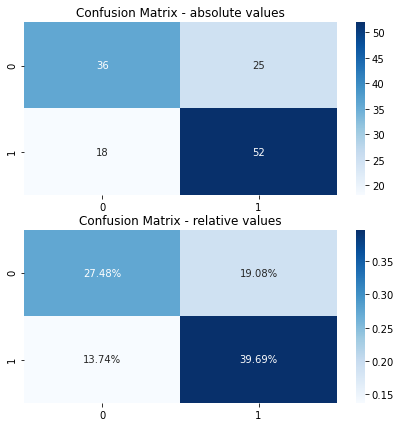

In [30]:
#RANDOM FOREST
#Initiate Random Forest algorithm
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 0)

#Fit the model
random_forest.fit(X_train, y_train)
#Predict outcomes
y_pred = random_forest.predict(X_test)
#Validate model
print(metrics.classification_report(y_test, y_pred))
print("Confusion Matrix:", '\n',metrics.confusion_matrix(y_test, y_pred))

#Add visualisation of confusion matrix
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
fig, (ax1, ax2) = plt.subplots(2, figsize = (7,7))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', ax = ax1)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues', ax=ax2)
ax1.set_title('Confusion Matrix - absolute values')
ax2.set_title('Confusion Matrix - relative values')
plt.show()

The results show that the Random Forest algorithm achieves an accuracy of 67% for predicting an increase of the Dow Jones Industrial Average. Inspecting the output of the confusinon matrix in closer detail reveals that the algorithm achieves better results in predicting a decrease of the Dow Jones Industrial Average. However, the results are not accurate enough to support investments in the stock market. Furthermore, the explanatory variables cover the same time period as the Dow Jones Industrial Average. I a real life situation, predictions have to be made with explanatory variables that cover past development. Therefore it can be assumed that the accurcay of the Random Forest algorithm would further decline when applied to live data.

In [31]:
#NAIVE BAYES
#Initiate Naive Bayes classifer model
naive_bayes = CategoricalNB()

#Train Naive Bayes Classifer
naive_bayes = naive_bayes.fit(X_train,y_train)

ValueError: Negative values in data passed to CategoricalNB (input X)

Unfortunately, the Naive Bayes algorithm only results in a value error, stating that matrix X contain negative values. Due to time constraints, I was unable to solve this final bug. The code below indicates that all values are greater that 0.

In [32]:
print('Boolean operation to check for negative values returns: ', (X_train < 0).values.any())
print('Smallest values of each column are: ','\n', X_train.min())
type(X_train['Open_nas'].iloc[0])

Boolean operation to check for negative values returns:  False
Smallest values of each column are:  
 Open_nas           1.129820e+03
High_nas           1.221600e+03
Low_nas            1.108490e+03
Close*_nas         1.172060e+03
Adj Close**_nas    1.172060e+03
Volume_nas         3.217730e+09
Open_snp           7.446900e+02
High_snp           7.801200e+02
Low_snp            6.997000e+02
Close*_snp         7.008200e+02
Adj Close**_snp    7.008200e+02
Volume_snp         2.995610e+09
Open_oil           1.805000e+01
High_oil           1.943000e+01
Low_oil            1.780000e+01
Close*_oil         1.800000e+01
Adj Close**_oil    1.800000e+01
Volume_oil         1.538280e+05
dtype: float64


numpy.float64

## Results/Discussion
The sklearn module allows it to easily apply and experimentise with maschine algorithms. This comes with the disadvantage, however, that the person applying these algorithms does not need to be explicitly trained for doing so, which might lead to misinterpretations of the generated output or an underestimation of the algorithms' limitations.
Overall, it can be said that the Random Forest algorithm achieved better results in both projects. 
As noted in the previous notebooks, the data wrangling before applying the machine-learning algorithms consumes most of the working time. 